In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# An Exploration of UN data
------------------
-----------------

In this project, you will do some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring.

## Guided Practice--------------



#### 1. Download the Gross Domestic Product (GDP) per capita [dataset](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD).  Rename it to gdp_per_capita.csv and place it in the data folder of your project repository. 

#### 2. Create a Jupyter Notebook in the notebooks folder and name it UN_Data_Exploration.n.

You will get errors along the way. When you do, read the errors to try to understand what was happening and how to correct it. Use markdown cells to record your answers to any questions asked in this exercise.


#### 3. In the first cell of your notebook, import the required packages with their customary aliases as at the very top of this notebook. ^^^^

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

#### 4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [10]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


#### 5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [13]:
gdp_df= gdp_df.drop('Value Footnotes', axis=1).rename(columns={'Country or Area':'Country', 'Value': 'GDP_Per_Capita'})

#### 6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [15]:
rows = gdp_df.shape[0]
columns = gdp_df.shape[1]
print(f'The dataframe gdp_df has {rows} rows and {columns} columns.')

The dataframe gdp_df has 8219 rows and 3 columns.


The following line of code reveals the data types of each column in gdp_df:

In [17]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [18]:
gdp_df['Country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', "CÃ´te d'Ivoire",
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excludin

In [19]:
gdp_df['Country'] = gdp_df['Country'].astype('string')

In [20]:
gdp_df.dtypes

Country           string[python]
Year                       int64
GDP_Per_Capita           float64
dtype: object

In [21]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   string 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 192.8 KB


#### 7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?


I notice that the further into the past the date is, the fewer instances of that year are located in the Year column. 

In [24]:
gdp_df['Year'].value_counts()

Year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

In [25]:
hmm = gdp_df.groupby('Country')['GDP_Per_Capita'].count().sort_values()

In [26]:
hmm[hmm < 34]

Country
Djibouti                     11
Turks and Caicos Islands     13
Sint Maarten (Dutch part)    15
Faroe Islands                16
Kosovo                       16
Cayman Islands               18
Virgin Islands               21
CuraÃ§ao                     24
Afghanistan                  24
San Marino                   26
Montenegro                   27
Serbia                       29
West Bank and Gaza           30
Greenland                    32
Syrian Arab Republic         33
Somalia                      33
Tonga                        33
Bhutan                       33
Lebanon                      33
Name: GDP_Per_Capita, dtype: int64

In [27]:
hmm.nsmallest(n=10, keep='all')

Country
Djibouti                     11
Turks and Caicos Islands     13
Sint Maarten (Dutch part)    15
Faroe Islands                16
Kosovo                       16
Cayman Islands               18
Virgin Islands               21
CuraÃ§ao                     24
Afghanistan                  24
San Marino                   26
Name: GDP_Per_Capita, dtype: int64

#### 8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [29]:
num_countries = gdp_df['Country'].nunique()
print(f'There are {num_countries} countries represented in the dataset.')

There are 247 countries represented in the dataset.


The following line of code will display the 12 least represented countries in the dataset. 

In [31]:
gdp_df['Country'].value_counts().tail(12)

Country
Serbia                       29
Montenegro                   27
San Marino                   26
CuraÃ§ao                     24
Afghanistan                  24
Virgin Islands               21
Cayman Islands               18
Faroe Islands                16
Kosovo                       16
Sint Maarten (Dutch part)    15
Turks and Caicos Islands     13
Djibouti                     11
Name: count, dtype: Int64

Perhaps these countries have so few observations due to these countries being more newly formed, or not having the resources to collect the necessary data.

In [33]:
gdp_df['Country'].unique() 

<StringArray>
[                'Afghanistan', 'Africa Eastern and Southern',
  'Africa Western and Central',                     'Albania',
                     'Algeria',                     'Andorra',
                      'Angola',         'Antigua and Barbuda',
                  'Arab World',                   'Argentina',
 ...
         'Upper middle income',                     'Uruguay',
                  'Uzbekistan',                     'Vanuatu',
                    'Viet Nam',              'Virgin Islands',
          'West Bank and Gaza',                       'World',
                      'Zambia',                    'Zimbabwe']
Length: 247, dtype: string

#### 9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [35]:
gdp_2021 = gdp_df[gdp_df['Year'] == 2021]

In [36]:
gdp_2021.head(2)

,Country,Year,GDP_Per_Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267


#### 10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [38]:
gdp_2021['GDP_Per_Capita'].describe()

count       247.000000
mean      24478.517262
std       24601.525764
min         836.665571
25%        5996.532844
50%       15900.976581
75%       37298.776853
max      135379.291201
Name: GDP_Per_Capita, dtype: float64

#### 11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

The shape of the distribution is right skewed.

<Axes: >

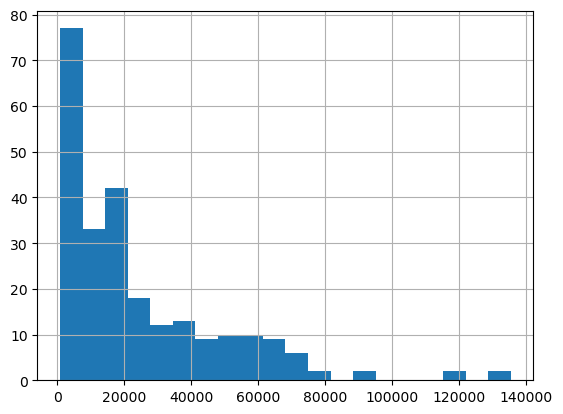

In [41]:
gdp_2021['GDP_Per_Capita'].hist(bins = 20)

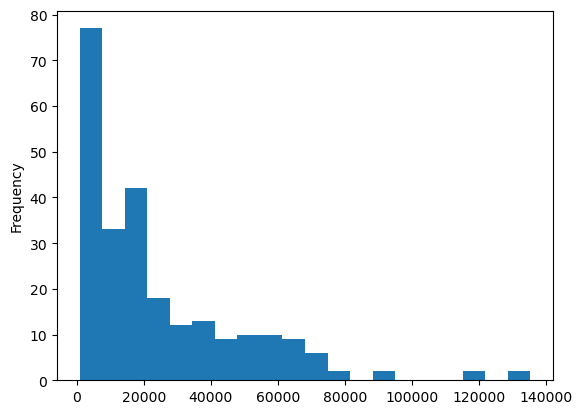

In [42]:
gdp_2021['GDP_Per_Capita'].plot(kind='hist', bins = 20);

In [43]:
print(f'The highest value in the GDP_Per_Capita column is: {gdp_2021['GDP_Per_Capita'].max()}.')

The highest value in the GDP_Per_Capita column is: 135379.29120102368.


In [44]:
print(f'While the lowest value in the GDP_Per_Capita column is: {gdp_2021['GDP_Per_Capita'].min()}.')

While the lowest value in the GDP_Per_Capita column is: 836.6655713378286.


#### 12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.'

In [46]:
s = gdp_2021.sort_values('GDP_Per_Capita', ascending=False)['Country'].head()
for i, el in enumerate(s.to_numpy()):
     print(f'{el} is number {i+1} on the list of top 5 countries by GDP per capita in 2021.')

Luxembourg is number 1 on the list of top 5 countries by GDP per capita in 2021.
Singapore is number 2 on the list of top 5 countries by GDP per capita in 2021.
Ireland is number 3 on the list of top 5 countries by GDP per capita in 2021.
Qatar is number 4 on the list of top 5 countries by GDP per capita in 2021.
Bermuda is number 5 on the list of top 5 countries by GDP per capita in 2021.


In [47]:
s = gdp_2021.sort_values('GDP_Per_Capita', ascending=False)['Country'].tail()
for i, el in enumerate(s.to_numpy()):
     print(f'{el} is number {i+1} on the list of bottom 5 countries by GDP per capita in 2021.')

Mozambique is number 1 on the list of bottom 5 countries by GDP per capita in 2021.
Somalia is number 2 on the list of bottom 5 countries by GDP per capita in 2021.
Dem. Rep. Congo is number 3 on the list of bottom 5 countries by GDP per capita in 2021.
Central African Republic is number 4 on the list of bottom 5 countries by GDP per capita in 2021.
Burundi is number 5 on the list of bottom 5 countries by GDP per capita in 2021.


In [48]:
gdp_2021.sort_values('GDP_Per_Capita', ascending=False) # another way of demonstrating the same thing

,Country,Year,GDP_Per_Capita
4425,Luxembourg,2021,135379.291201
6513,Singapore,2021,131864.092336
3492,Ireland,2021,118594.746862
6118,Qatar,2021,116832.570290
740,Bermuda,2021,92276.234605
...,...,...,...
5132,Mozambique,2021,1457.235409
6698,Somalia,2021,1392.464262
1733,Dem. Rep. Congo,2021,1313.618218
1301,Central African Republic,2021,1128.552380


In [49]:
gdp_2021.nsmallest(5, "GDP_Per_Capita", keep='all')  # another way of demonstrating the same thing

,Country,Year,GDP_Per_Capita
1045,Burundi,2021,836.665571
1301,Central African Republic,2021,1128.552380
1733,Dem. Rep. Congo,2021,1313.618218
6698,Somalia,2021,1392.464262
5132,Mozambique,2021,1457.235409


In [50]:
gdp_2021.nlargest(5, 'GDP_Per_Capita') # a way to view the top 5 countries only

,Country,Year,GDP_Per_Capita
4425,Luxembourg,2021,135379.291201
6513,Singapore,2021,131864.092336
3492,Ireland,2021,118594.746862
6118,Qatar,2021,116832.570290
740,Bermuda,2021,92276.234605


In [51]:
gdp_2021.nsmallest(5, 'GDP_Per_Capita') # a way to view the bottom 5 countries only

,Country,Year,GDP_Per_Capita
1045,Burundi,2021,836.665571
1301,Central African Republic,2021,1128.552380
1733,Dem. Rep. Congo,2021,1313.618218
6698,Somalia,2021,1392.464262
5132,Mozambique,2021,1457.235409


#### 13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [53]:
gdp_df.loc[(gdp_df['Year']==1990) | (gdp_df['Year']==2021)].head() # testing to see how many rows would be present in 1990 and 2021

,Country,Year,GDP_Per_Capita
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
57,Africa Eastern and Southern,1990,3386.854480
60,Africa Western and Central,2021,4698.926894
91,Africa Western and Central,1990,3299.401375


In [54]:
#gdp_pivoted = pd.pivot_table(
#    gdp_df.loc[(gdp_df['Year']==1990) | (gdp_df['Year']==2021)],
#    values='GDP_Per_Capita',
#    index='Country',
#    columns='Year'
#) # curious to save this code for later exploration

In [55]:
gdp_pivoted = (
    gdp_df
    [gdp_df["Year"].isin([1990, 2021])]
    .pivot_table(index="Country", columns="Year", values="GDP_Per_Capita")
    .dropna(subset = [1990, 2021])
)

In [56]:
gdp_pivoted.head(2)

Year,1990,2021
Country,,
Africa Eastern and Southern,3386.854480,3934.287267
Africa Western and Central,3299.401375,4698.926894


In [57]:
gdp_pivoted = gdp_pivoted.reset_index() #flattening out column titles
gdp_pivoted.head(2)

Year,Country,1990,2021
0,Africa Eastern and Southern,3386.854480,3934.287267
1,Africa Western and Central,3299.401375,4698.926894


In [58]:
gdp_pivoted = gdp_pivoted.dropna(axis=0, ignore_index=True)
gdp_pivoted.head(2)

Year,Country,1990,2021
0,Africa Eastern and Southern,3386.854480,3934.287267
1,Africa Western and Central,3299.401375,4698.926894


#### 14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [60]:
gdp_pivoted['Percent_Change'] = (100*(gdp_pivoted[2021]-gdp_pivoted[1990]) / gdp_pivoted[1990])
gdp_pivoted.head()

Year,Country,1990,2021,Percent_Change
0,Africa Eastern and Southern,3386.854480,3934.287267,16.163458
1,Africa Western and Central,3299.401375,4698.926894,42.417559
2,Albania,5327.747458,16113.136519,202.438069
3,Algeria,11728.545729,14496.865470,23.603265
4,Andorra,50036.300776,59332.202910,18.578316


#### 15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [62]:
print(f'There were {gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].shape[0]} countries which experienced a negative percent change in GDP per capita from 1990 to 2021.')

There were 23 countries which experienced a negative percent change in GDP per capita from 1990 to 2021.


In [63]:
#print(f'There are this many: {(gdp_pivoted['Percent_Change'] < 0).sum()} countries )

In [64]:
gdp_pivoted[gdp_pivoted['Percent_Change'].le(0)] # which country's percent change was less than or equal to zero.

Year,Country,1990,2021,Percent_Change
16,Barbados,16976.761648,15683.884713,-7.615569
27,Brunei,118163.683198,78248.797110,-33.779318
30,Burundi,1396.077627,836.665571,-40.070269
36,Central African Republic,1481.252551,1128.552380,-23.810941
43,Congo,8699.526839,6263.211613,-28.005146
49,Dem. Rep. Congo,2172.001597,1313.618218,-39.520384
71,Fragile and conflict affected situations,6062.707946,5245.734664,-13.475386
73,Gabon,23884.810700,18523.579803,-22.446194
84,Haiti,3946.365646,3134.950149,-20.561083
111,Kyrgyz Republic,6095.681086,5736.478834,-5.892734


#### 16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare? 
Bonus: Put both line charts on the same plot.

In [66]:
print(f'The highest value in the percent change column is: {gdp_pivoted['Percent_Change'].max()}.')

The highest value in the percent change column is: 1398.1460518348676.


In [67]:
two_max_gdp_change = gdp_pivoted.nlargest(1, "Percent_Change")['Country']
for i in two_max_gdp_change:
     print(f'{i} had the highest percent change in GDP per capita.')

Equatorial Guinea had the highest percent change in GDP per capita.


How do the trends in these countries compare?: The trends in these countries couldn't be more different. China has a slow and steady sloping rise. While Equatorial Guinea has a sharper increase in GDP per capita until about 2007, when there is a sharp decline that nearly recovers and then simply continues to decline through to the end of the dataset, 2021. Around 2019 the GDP per capita for each country crossed each other on the line graph, Equitorial Guinea going down and China continuing to rise.

<Axes: xlabel='Year'>

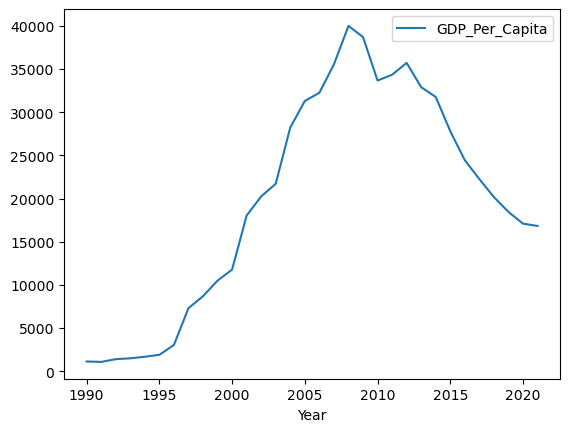

In [69]:
(
    gdp_df[gdp_df['Country'] == "Equatorial Guinea"]
    .loc[gdp_df["Year"] <= 2021]
    .loc[gdp_df["Year"] >= 1990]
    .plot(x="Year", y="GDP_Per_Capita", kind="line")
    
)

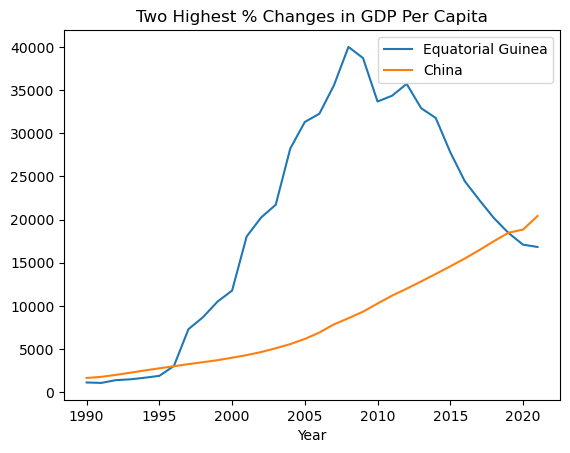

In [70]:
ax=(
gdp_df
.loc[gdp_df['Country'] == 'Equatorial Guinea']
.loc[gdp_df['Year'] <= 2021]
.loc[gdp_df['Year'] >= 1990]
.plot(x="Year", y="GDP_Per_Capita", kind="line", label = 'Equatorial Guinea')
)
(
gdp_df
.loc[gdp_df['Country'] == 'China']
.loc[gdp_df['Year'] <= 2021]
.loc[gdp_df['Year'] >= 1990]
.plot(
    x="Year", 
    y="GDP_Per_Capita", 
    kind="line", 
    label='China', 
    title="Two Highest % Changes in GDP Per Capita",
    ax=ax)
);

#### 17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [72]:
continents = pd.read_csv("../data/continents.csv")

In [73]:
continents.head(2)

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania


#### 18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.



In [75]:
gdp_df.dtypes #inspect the columns to determine the data types

Country           string[python]
Year                       int64
GDP_Per_Capita           float64
dtype: object

In [260]:
gdp_df.head(2) #inspecting dataset's column titles

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2023,1992.424394,Asia
1,Afghanistan,2022,1981.710168,Asia


In [262]:
gdp_df['Year'] = pd.to_numeric(gdp_df["Year"], errors="coerce") #changing my year column to numeric value 
#without simply dropping data unnecessarily

In [264]:
gdp_df.dtypes #checked to see if it was successful

Country            object
Year                int64
GDP_Per_Capita    float64
Continent          object
dtype: object

In [266]:
gdp_df.head(2)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2023,1992.424394,Asia
1,Afghanistan,2022,1981.710168,Asia


In [268]:
gdp_df = pd.merge( 
    left = gdp_df, 
    right = continents, 
    validate = "many_to_one",
    how = 'inner',
)
gdp_df.head(2)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2023,1992.424394,Asia
1,Afghanistan,2022,1981.710168,Asia


#### 19. Determine the number of countries per continent. Create a bar chart showing this.

In [332]:
s = gdp_df.groupby('Continent')['Country'].nunique()
for i, el in zip(s.index, s.to_numpy()):
     print(f'There are {el} countires on the continent of {i}.')

There are 50 countires on the continent of Africa.
There are 41 countires on the continent of Asia.
There are 45 countires on the continent of Europe.
There are 26 countires on the continent of North America.
There are 14 countires on the continent of Oceania.
There are 11 countires on the continent of South America.


In [352]:
print(f'There are {gdp_df['Continent'].value_counts().nunique()} unqiue continents in this dataset.')

There are 6 unqiue continents in this dataset.


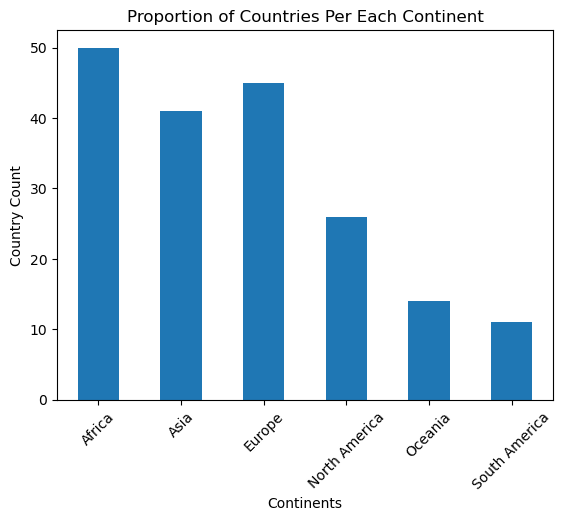

In [391]:
a = gdp_df.groupby('Continent')['Country'].nunique()
ax = pd.Series(a).plot(kind="bar", rot=45)
ax.set_title("Proportion of Countries Per Each Continent")
ax.set_xlabel("Continents")
ax.set_ylabel("Country Count")
plt.show()

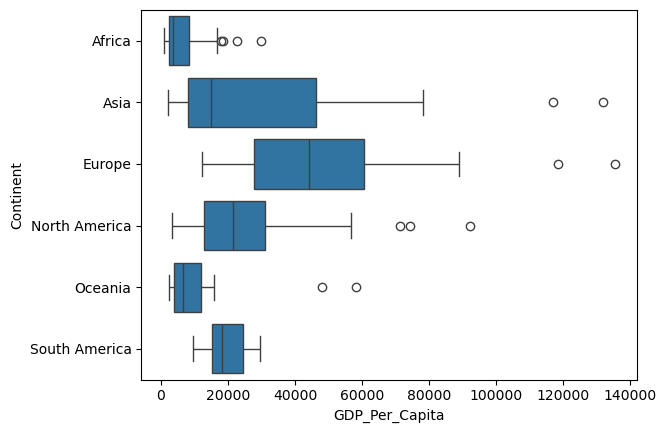

In [93]:
sns.boxplot(data=gdp_df[gdp_df['Year'] == 2021].sort_values(by="Continent"), x="GDP_Per_Capita", y="Continent");

In [338]:
gdp_df['Continent'].value_counts(normalize=True)

Continent
Africa           0.267603
Europe           0.238224
Asia             0.220022
North America    0.138592
Oceania          0.075842
South America    0.059716
Name: proportion, dtype: float64

Europe and Asia have the higher levels of GDP overall. Though Asia has a large right skew. 

#### 21. Download the full csv containing Life expectancy at birth, total (years) from [this site](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

In [408]:
life_expectancy = pd.read_csv("../data/life_expectancy.csv", skiprows=4)
life_expectancy.head(2) #skipped first 4 rows in order to properly read in the data and skip redundant info

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.049000,64.215000,64.60200,64.944000,65.303000,65.615000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.22600,76.353000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.169658,44.468838,44.87789,45.160583,45.535695,45.770723,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.48702,65.146291,NaN,NaN


#### 22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [415]:
life_expectancy_melt = (
    life_expectancy
    .drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 69'])
    .melt(id_vars = "Country Name", var_name = "Year", value_name = "Life_Expectancy")
    .rename(columns = {"Country Name": "Country"})
);
life_expectancy_melt.head(2)

,Country,Year,Life_Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658


#### 23. What was the first country with a life expectancy to exceed 80?

In [491]:
s = life_expectancy_melt.loc[life_expectancy_melt["Life_Expectancy"] >= 80].sort_values('Year')['Country']
for i, el in enumerate(s.to_numpy()):
    if i == 0:
     print(f'{el} was the {i+1}st country with a life expectancy to exceed 80.')
    else:
        i == 1
    break  

Monaco was the 1st country with a life expectancy to exceed 80.


In [493]:
#classmate, Sarah Mulloy's, code: create new dataframe with only rows with life expectancy over 80, and sort it by year
year_by_expect= life_expectancy_melt.loc[life_expectancy_melt["Life_Expectancy"] >= 80].sort_values(by='Year')

#Filter the country and year info from this dataframe of the first country to achieve 80 life expectancy 
year_by_expect['Year']= year_by_expect['Year'].astype(int) #convert year values to integer to make filtering easier
ctry_to_80= year_by_expect.nsmallest(1, 'Year', keep='all')['Country'] #pull out smallest, aka first year to reach 80, and pull out the country name from the dataframe
year_to_80= year_by_expect.nsmallest(1, 'Year', keep='all')['Year']
print(f'The First country for life expectancy to exceed 80 is {ctry_to_80.values[0]} in {year_to_80.values[0]}')

The First country for life expectancy to exceed 80 is Monaco in 1992


#### 24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [495]:
life_expectancy_melt.head(2)

,Country,Year,Life_Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658


In [497]:
life_expectancy_melt.dtypes #inspecting data types

Country             object
Year                object
Life_Expectancy    float64
dtype: object

In [499]:
life_expectancy_melt["Year"] = pd.to_numeric(life_expectancy_melt["Year"], errors="coerce") 
#converting to numeric without losing data unnecessarily

In [110]:
life_expectancy_melt.tail(2)

,Country,Year,Life_Expectancy
17288,Zambia,2024,NaN
17289,Zimbabwe,2024,NaN


In [501]:
gdp_df["Year"] = pd.to_numeric(gdp_df["Year"], errors="coerce") #converting to numeric without losing data unnecessarily

In [503]:
gdp_le = pd.merge(
    left=life_expectancy_melt,
    right=gdp_df,
    left_on=["Country", "Year"],
    right_on=["Country", "Year"],
    how="inner",
    validate="one_to_one"
)
gdp_le.head(2)

,Country,Year,Life_Expectancy,GDP_Per_Capita,Continent
0,Aruba,1990,72.546,34579.220640,North America
1,Angola,1990,41.854,7391.752354,Africa


#### 25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

In [519]:
gdp_le_2021 = gdp_le[gdp_le["Year"]==2021]

In [521]:
(gdp_le_2021["Life_Expectancy"]>= 80).sum()#.count()#.iloc[0]
# would like print statment instead of just this simple number with no explanation

33

In [528]:
print(f'There are {gdp_le_2021[gdp_le_2021["Life_Expectancy"]>= 80].count().iloc[0]} countries that have a life expectancy of at least 80 in 2021.')

There are 33 countries that have a life expectancy of at least 80 in 2021.


#### 26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.



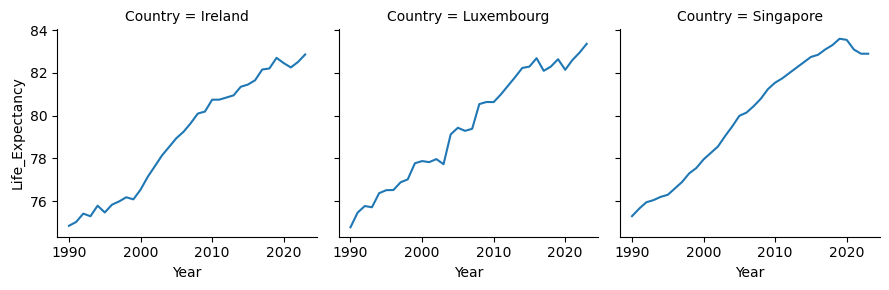

In [540]:
g = sns.FacetGrid(
    gdp_le[gdp_le['Country'].isin(gdp_le_2021.nlargest(3, 'GDP_Per_Capita')['Country'])], #top 3
    col="Country", 
)
g.map(plt.plot, 'Year', 'Life_Expectancy')

#### 27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

There may be a positive correlation between life expectancy and GDP per capita

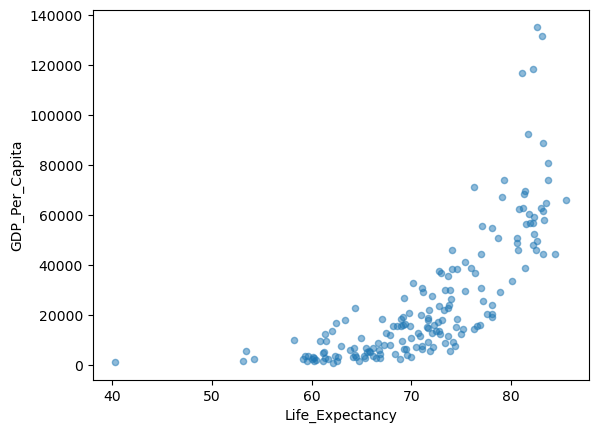

In [546]:
gdp_le[gdp_le["Year"] == 2021].plot(
    kind="scatter",
    x="Life_Expectancy",
    y="GDP_Per_Capita",
    alpha=0.5
);

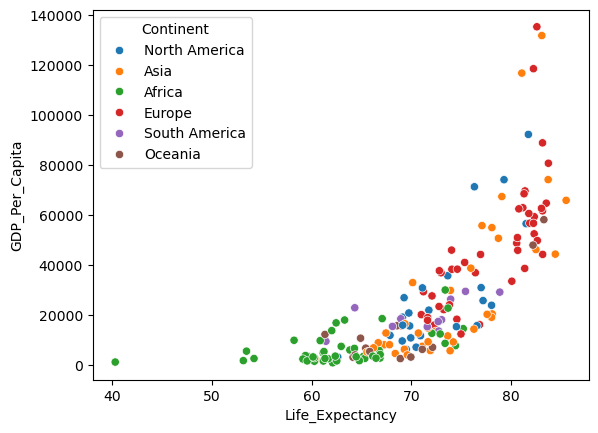

In [131]:
sns.scatterplot(
    data=gdp_le[gdp_le['Year'] == 2021],
    x="Life_Expectancy",
    y="GDP_Per_Capita",
    hue="Continent"
);

#### 28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

In [554]:
gdp_le_2021 = gdp_le[gdp_le["Year"] == 2021].copy()
gdp_le_2021[['Life_Expectancy', 'GDP_Per_Capita']].corr()

,Life_Expectancy,GDP_Per_Capita
Life_Expectancy,1.000000,0.752785
GDP_Per_Capita,0.752785,1.000000


In [579]:
gdp_le_2021 = gdp_le[gdp_le["Year"] == 2021].copy()
print(f'The value of {gdp_le_2021[['Life_Expectancy', 'GDP_Per_Capita']].corr()['GDP_Per_Capita'].iloc[0]} demonstrates that there is a pretty strong correlation.')

The value of 0.7527849922684221 demonstrates that there is a pretty strong correlation.


#### 29. Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. 
#### Find the correlation between the log of GDP per capita and life expectancy. 
#### How does this compare to the calculation in the previous part? 
#### Look at a scatter plot to see if the result of this calculation makes sense.

In [660]:
gdp_le_2021["GDP_Per_Capita_log"] = np.log(gdp_le_2021["GDP_Per_Capita"]) 
#Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita.

How does this compare to the calculation in the previous part? 

In [650]:
gdp_le_2021[['Life_Expectancy', 'GDP_Per_Capita', 'GDP_Per_Capita_log']].corr()

,Life_Expectancy,GDP_Per_Capita,GDP_Per_Capita_log
Life_Expectancy,1.000000,0.752785,0.849065
GDP_Per_Capita,0.752785,1.000000,0.857318
GDP_Per_Capita_log,0.849065,0.857318,1.000000


In [670]:
print(f'The value {gdp_le_2021[['Life_Expectancy', 'GDP_Per_Capita', 'GDP_Per_Capita_log']].corr()['GDP_Per_Capita_log'].iloc[0]} demonstrates a \nstronger correlation between Life Expectancy \nand GDP Per Capita than originally thought.')

The value 0.8490647859471863 demonstrates a 
stronger correlation between Life Expectancy 
and GDP Per Capita than originally thought.


There seems to be a higher positive correlation between Life Expectancy and GDP Per Capita. It is a curved relationship: while one variable increases the other variable increases at a higher rate. The scatterplot below appears to be consistent with the previous findings. 

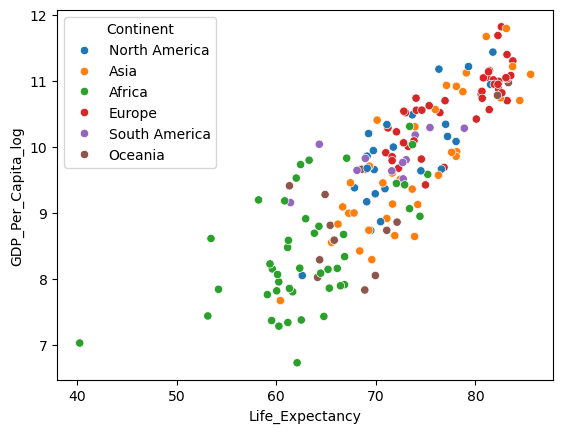

In [674]:
sns.scatterplot(
    data=gdp_le_2021,
    x="Life_Expectancy",
    y="GDP_Per_Capita_log",
    hue="Continent"
);